In [35]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from plotnine import *

### Part 2: 
### Case 1


In [36]:
# Q1
df = pd.read_csv('https://raw.githubusercontent.com/robertasgabrys/Forecasting/main/Nenana1.csv')
df.head()

,Year,Date & Time
0,1917,April 30 at 11:30 AM
1,1918,May 11 at 9:33 AM
2,1919,May 3 at 2:33 PM
3,1920,May 11 at 10:46 AM
4,1921,May 11 at 6:42 AM


### Q2 : KPI

In [37]:
df.dtypes


Year            int64
Date & Time    object
dtype: object

In [38]:
df['Date'] = df['Year'].astype(str) + ' ' + df['Date & Time']
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes


Year                    int64
Date & Time            object
Date           datetime64[ns]
dtype: object

In [39]:
df['Firstday'] = df['Year'].astype(str) + '-01-01'
df['Firstday'] = pd.to_datetime(df['Firstday'])
df['KPI'] = (df['Date'] - df['Firstday']).dt.days
df.head()

,Year,Date & Time,Date,Firstday,KPI
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130


### Q3. Create a graph of KPI

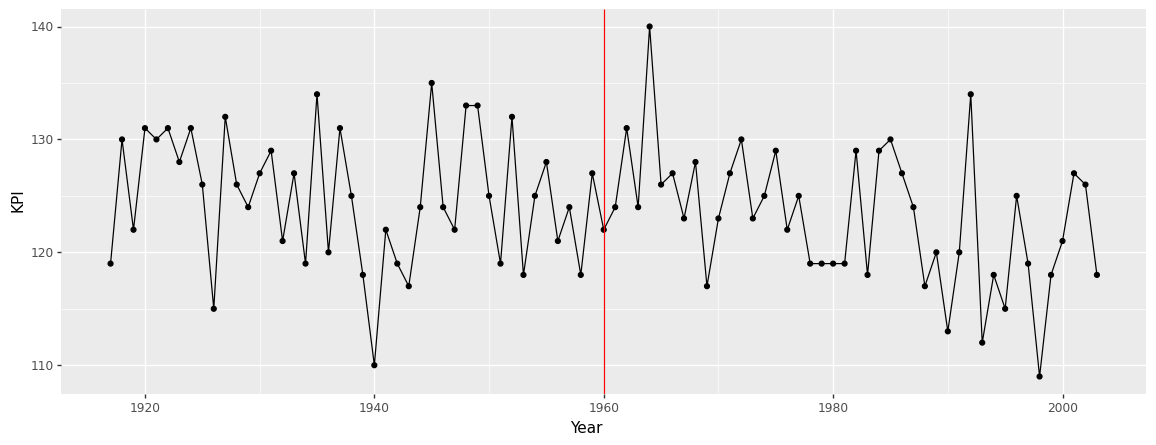

<ggplot: (116069465688)>

In [40]:
(
   ggplot(df,aes('Year','KPI')) + geom_point() + geom_line() 
   + geom_vline(xintercept = 1960, color='red')
   + theme(figure_size=(14,5))
)

In [41]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [42]:
df['Trend'] = range(1,88)
df.head()

,Year,Date & Time,Date,Firstday,KPI,Trend
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119,1
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130,2
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122,3
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131,4
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130,5


In [43]:
M = smf.ols('KPI ~ Trend', data=df).fit()
print(M.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     7.470
Date:                Sun, 11 Sep 2022   Prob (F-statistic):            0.00763
Time:                        16:03:58   Log-Likelihood:                -274.64
No. Observations:                  87   AIC:                             553.3
Df Residuals:                      85   BIC:                             558.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.8952      1.244    102.012      0.0

In [44]:
df['M'] = M.fittedvalues

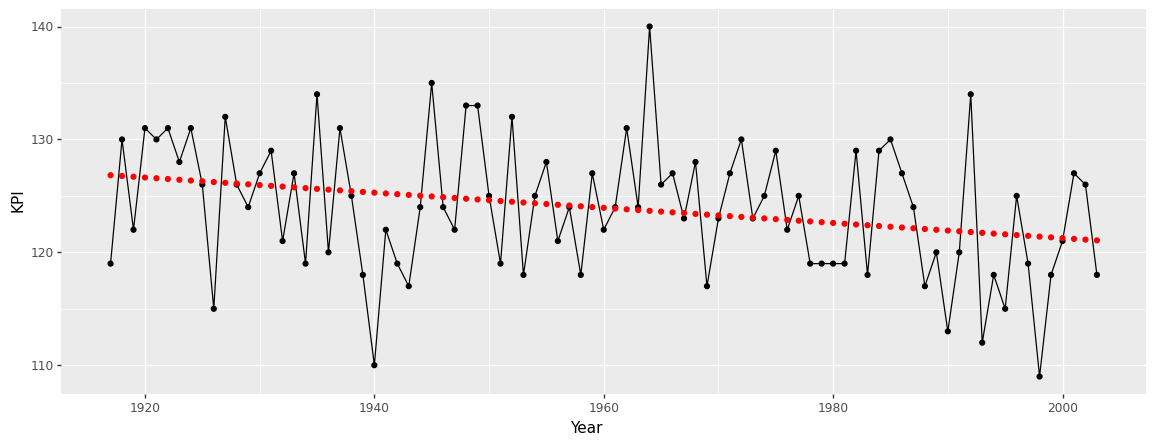

<ggplot: (116069486638)>

In [45]:
(
   ggplot(df,aes('Year','KPI')) + geom_point() + geom_line() 
   + geom_point(aes('Year','M'), color='Red')    
   + theme(figure_size=(14,5))
)

In [46]:
df.head()

,Year,Date & Time,Date,Firstday,KPI,Trend,M
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119,1,126.828109
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130,2,126.761002
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122,3,126.693896
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131,4,126.626789
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130,5,126.559683


### Q4 : Assessing the significance in the abrupt change in KPI

In [47]:
df[df.Year == 1960]

,Year,Date & Time,Date,Firstday,KPI,Trend,M
43,1960,May 2 at 7:12 PM,1960-05-02 19:12:00,1960-01-01,122,44,123.942529


In [48]:
df['BM'] = 0
df.loc[43:, 'BM'] = 1

In [49]:
# build a regresssion model to assess abrupt change

M1 = smf.ols('KPI~BM', data=df).fit()
print(M1.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     2.369
Date:                Sun, 11 Sep 2022   Prob (F-statistic):              0.127
Time:                        16:03:58   Log-Likelihood:                -277.10
No. Observations:                  87   AIC:                             558.2
Df Residuals:                      85   BIC:                             563.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.9302      0.902    138.456      0.0

In [50]:
M1.pvalues[1] / 2  # one sided p-value

0.06373108025635693

P-value is larger than the significant level (0.05). Thus, we cannot say that there is a statistically significant difference between these two periods.
There was no abrupt change in KPI.

### Q5 : Does data provide statistically significant evidence of global warming? 
Answer this question by assessing the significance in the abrupt change in KPI.

Since BM variable's p-value(0.063) is larger than the significance level (0.05), we cannot say that there was abrupt change in KPI.

In [51]:
df['M1'] = M1.fittedvalues
df.head()

,Year,Date & Time,Date,Firstday,KPI,Trend,M,BM,M1
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119,1,126.828109,0,124.930233
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130,2,126.761002,0,124.930233
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122,3,126.693896,0,124.930233
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131,4,126.626789,0,124.930233
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130,5,126.559683,0,124.930233


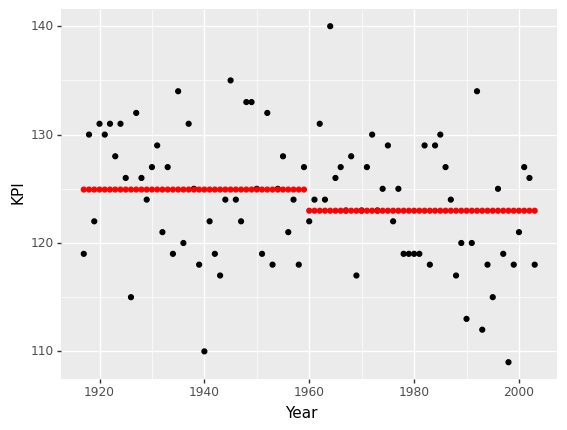

<ggplot: (116069529769)>

In [52]:
(
    ggplot(df, aes('Year', 'KPI'))
    + geom_point()
    + geom_point(aes('Year', 'M1'), color='red')
)

## Gradual change

In [53]:
df['Ramp'] = 0
df.loc[43:, 'Ramp'] = list(range(1,45))

In [54]:
df[df.Year == 1960]

,Year,Date & Time,Date,Firstday,KPI,Trend,M,BM,M1,Ramp
43,1960,May 2 at 7:12 PM,1960-05-02 19:12:00,1960-01-01,122,44,123.942529,1,122.977273,1


In [55]:
# build a regresssion model to assess gradual change
M2 = smf.ols('KPI ~ BM + Ramp', data=df).fit()
print(M2.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     5.339
Date:                Sun, 11 Sep 2022   Prob (F-statistic):            0.00656
Time:                        16:03:59   Log-Likelihood:                -273.10
No. Observations:                  87   AIC:                             552.2
Df Residuals:                      84   BIC:                             559.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.9302      0.867    144.131      0.0

In [56]:
# BM is not significant, while Ramp is significant:
M2.pvalues[2] / 2

0.00276526124220351

In [57]:
# On average, KPI decreased by 0.192 each year

In [58]:
df['M2'] = M2.fittedvalues
df.tail()

,Year,Date & Time,Date,Firstday,KPI,Trend,M,BM,M1,Ramp,M2
82,1999,April 29 at 9:47 PM,1999-04-29 21:47:00,1999-01-01,118,83,121.325375,1,122.977273,40,119.614165
83,2000,May 1 at 10:47 AM,2000-05-01 10:47:00,2000-01-01,121,84,121.258268,1,122.977273,41,119.421987
84,2001,May 8 at 1:00 PM,2001-05-08 13:00:00,2001-01-01,127,85,121.191162,1,122.977273,42,119.229810
85,2002,May 7 at 9:27 PM,2002-05-07 21:27:00,2002-01-01,126,86,121.124055,1,122.977273,43,119.037632
86,2003,April 29 at 6:22 PM,2003-04-29 18:22:00,2003-01-01,118,87,121.056949,1,122.977273,44,118.845455


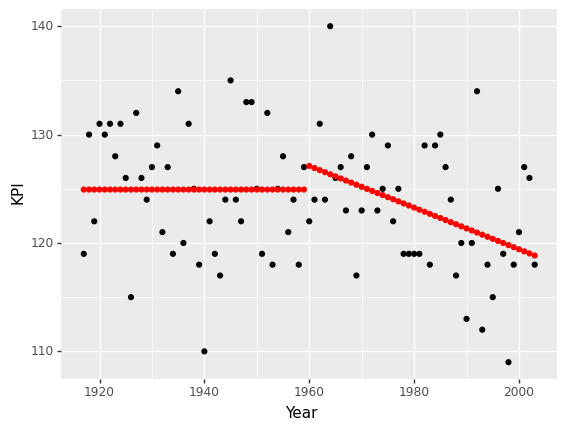

<ggplot: (116069453677)>

In [59]:
(
    ggplot(df, aes('Year', 'KPI')) + geom_point()
    + geom_point(aes('Year', 'M2'), color='red')
)

In [60]:
# build a regresssion model to assess only gradual intervention
M3 = smf.ols('KPI ~ Ramp', data=df).fit()
print(M3.summary())

# Interpretation : After 1960, the KPI decreased by 0.1281 each year on average
# the gradual change is statistically significant enough. (p-value is smaller than significance levels)

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     9.143
Date:                Sun, 11 Sep 2022   Prob (F-statistic):            0.00330
Time:                        16:03:59   Log-Likelihood:                -273.86
No. Observations:                  87   AIC:                             551.7
Df Residuals:                      85   BIC:                             556.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.4002      0.778    161.111      0.0

In [61]:
df['M3'] = M3.fittedvalues

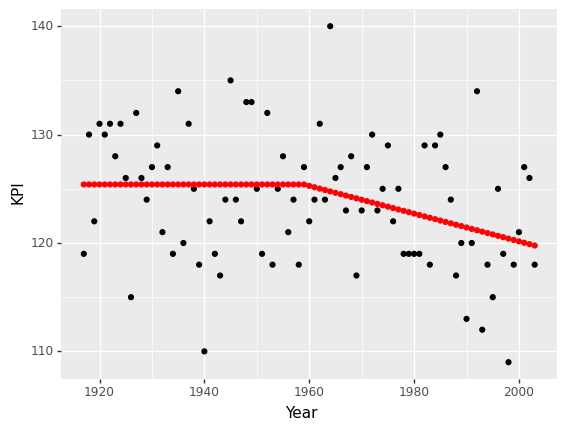

<ggplot: (116069489589)>

In [62]:
(
    ggplot(df, aes('Year', 'KPI')) + geom_point()
    + geom_point(aes('Year', 'M3'), color='red')
)

In [63]:
# let's assess whether the slope of a line before intervention is statistically siginificant different from 0

M = smf.ols('KPI ~ Trend', data=df.iloc[0:43,]).fit()
print(M.summary())

# no reason that the period has some statistically meaningful difference

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9929
Date:                Sun, 11 Sep 2022   Prob (F-statistic):              0.325
Time:                        16:04:00   Log-Likelihood:                -135.64
No. Observations:                  43   AIC:                             275.3
Df Residuals:                      41   BIC:                             278.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.4950      1.803     70.161      0.0

## Q6 : Which one – abrupt or gradual effect of the intervention in 1960 is more appropriate?

Gradual effect of the intervention in 1960 is more appropriate.
When we compared the different 2 periods, there was no significant difference between the means of KPI.
However, when we use Ramp variable, we could find a significant difference in the relation of Ramp and KPI. 

In [64]:
# Q10
df2 = pd.read_csv('https://raw.githubusercontent.com/robertasgabrys/Forecasting/main/Nenana2.csv')
df2.tail()

,Year,Date & Time
100,2017,May 1 at 12:00 PM
101,2018,May 1 at 1:18 PM
102,2019,April 14 at 12:21 AM
103,2020,April 27 at 12:56 PM
104,2021,April 30 at 12:50 PM


In [65]:
df2['Date'] = df2['Year'].astype(str) + ' ' + df2['Date & Time']
df2['Date'] = pd.to_datetime(df2['Date'])


In [66]:
df2['Firstday'] = df2['Year'].astype(str) + '-01-01'
df2['Firstday'] = pd.to_datetime(df2['Firstday'])
df2['KPI'] = (df2['Date'] - df2['Firstday']).dt.days
df2.head()

,Year,Date & Time,Date,Firstday,KPI
0,1917,April 30 at 11:30 AM,1917-04-30 11:30:00,1917-01-01,119
1,1918,May 11 at 9:33 AM,1918-05-11 09:33:00,1918-01-01,130
2,1919,May 3 at 2:33 PM,1919-05-03 14:33:00,1919-01-01,122
3,1920,May 11 at 10:46 AM,1920-05-11 10:46:00,1920-01-01,131
4,1921,May 11 at 6:42 AM,1921-05-11 06:42:00,1921-01-01,130


In [67]:
df2.drop(['Date & Time'], axis=1, inplace=True)

In [68]:
df2.head()

,Year,Date,Firstday,KPI
0,1917,1917-04-30 11:30:00,1917-01-01,119
1,1918,1918-05-11 09:33:00,1918-01-01,130
2,1919,1919-05-03 14:33:00,1919-01-01,122
3,1920,1920-05-11 10:46:00,1920-01-01,131
4,1921,1921-05-11 06:42:00,1921-01-01,130


In [69]:
df2[df2.Year == 1960]


,Year,Date,Firstday,KPI
43,1960,1960-05-02 19:12:00,1960-01-01,122


### Abrupt Change

In [70]:
df2['BM'] = 0
df2.loc[43:, 'BM'] = 1

In [71]:
df2.tail()

,Year,Date,Firstday,KPI,BM
100,2017,2017-05-01 12:00:00,2017-01-01,120,1
101,2018,2018-05-01 13:18:00,2018-01-01,120,1
102,2019,2019-04-14 00:21:00,2019-01-01,103,1
103,2020,2020-04-27 12:56:00,2020-01-01,117,1
104,2021,2021-04-30 12:50:00,2021-01-01,119,1


In [72]:
# build a regresssion model to assess abrupt change

M1_new = smf.ols('KPI~BM', data=df2).fit()
print(M1_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     7.108
Date:                Sun, 11 Sep 2022   Prob (F-statistic):            0.00891
Time:                        16:15:19   Log-Likelihood:                -342.25
No. Observations:                 105   AIC:                             688.5
Df Residuals:                     103   BIC:                             693.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.9302      0.970    128.782      0.0

In [73]:
M1_new.pvalues[1] / 2  # one sided p-value

0.004456604527011816

Statistically significance difference between two periods (BM's P-value is lower than significance level 0.05). There was an abrupt change in KPI after 1960.


In [77]:
df2['M1_new'] = M1_new.fittedvalues
df2.head()

,Year,Date,Firstday,KPI,BM,M1_new
0,1917,1917-04-30 11:30:00,1917-01-01,119,0,124.930233
1,1918,1918-05-11 09:33:00,1918-01-01,130,0,124.930233
2,1919,1919-05-03 14:33:00,1919-01-01,122,0,124.930233
3,1920,1920-05-11 10:46:00,1920-01-01,131,0,124.930233
4,1921,1921-05-11 06:42:00,1921-01-01,130,0,124.930233


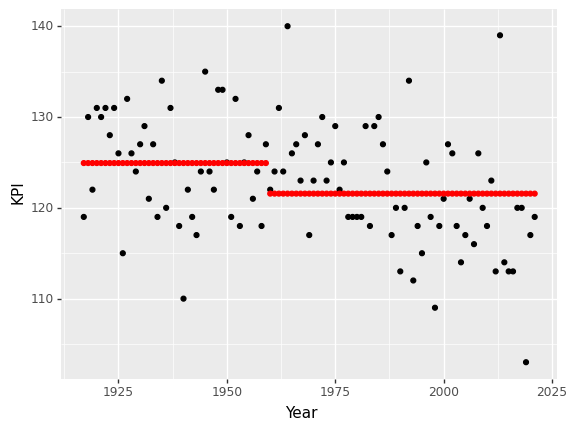

<ggplot: (116070130207)>

In [78]:
(
    ggplot(df2, aes('Year', 'KPI'))
    + geom_point()
    + geom_point(aes('Year', 'M1_new'), color='red')
)

### Gradual Change

In [87]:
df2['Ramp'] = 0
df2.loc[43:, 'Ramp'] = list(range(1, len(df2) - 42))


In [89]:
# build a regresssion model to assess only gradual intervention
M3_new = smf.ols('KPI ~ Ramp', data=df2).fit()
print(M3_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    KPI   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     23.43
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           4.56e-06
Time:                        16:27:04   Log-Likelihood:                -335.00
No. Observations:                 105   AIC:                             674.0
Df Residuals:                     103   BIC:                             679.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.4612      0.779    161.130      0.0

In [90]:
# Interpretation : After 1960, the KPI decreased by 0.1281 each year on average
# the gradual change is statistically significant enough. (p-value is smaller than significance levels)

In [91]:
df2['M3_new'] = M3_new.fittedvalues

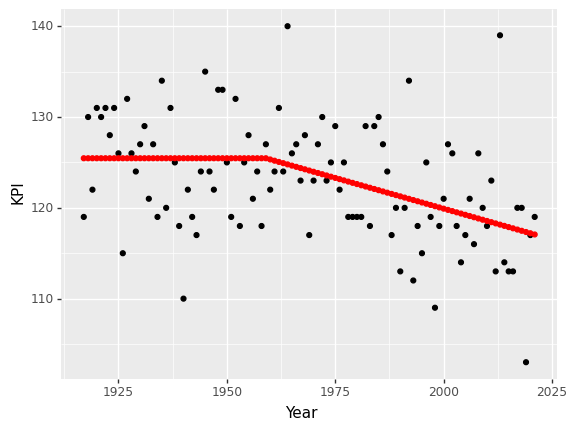

<ggplot: (116070090927)>

In [92]:
(
    ggplot(df2, aes('Year', 'KPI')) + geom_point()
    + geom_point(aes('Year', 'M3_new'), color='red')
)